# Reconstructing $D$ mesons

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

To prepare for this activity, you should already have looked at the activity on <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/ACTIVITY_dimuon_spectrum.ipynb">how to reconstruct particles from their decay products</a> and <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/hello_CLEO.ipynb">how to interface with CLEO data</a>.

After you are familiar with those activities, use the <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/download_more_data.ipynb">download-more-data notebook</a> and grab the Monte Carlo file that simulates the following decay:

$$D^+ \rightarrow K^- \pi^+ \pi^+$$ 
Also grab the CLEO data file. 

Your challenge is to reconstruct the $D^+$ meson in the Monte Carlo and then go to the data and see if you can find the $D^+$ in the same decay mode. Things to think about:

* Make sure you deal with all possible $K\pi\pi$ combinations.
* How much background is there under the peak in the data? How might you eliminate it? Can you eliminate all of it?
* Is there "structure" in the $K\pi$ systems? That is, when you plot the invariant mass of the $K\pi$ system, do you see any peaks?
* Can you make a <a href="https://en.wikipedia.org/wiki/Dalitz_plot">Dalitz</a> <a href="http://www2.warwick.ac.uk/fac/sci/physics/staff/academic/gershon/talks/gershon-BadHonnef.pdf">plot</a> for this decay mode?
* Can you find the other decay modes in the data that you have MC for? 

Have fun and good luck!

$D^+$ are the lightest particles containing charm quarks
* Made up of a charm and anti-down quark
* Mass = 1.87 GeV

$K^-$ is the anti-particle of the Kaon or K Meson
* Made up of an anti-up and an strange quark (Anti-quark + quark = MESON)
* Mass = 0.494 GeV

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV

In [2]:
import sys
sys.path.append("../tools/")
import numpy as np
import cms_tools
import cleo_tools as cleo
import matplotlib.pyplot as plt
%matplotlib inline

infile = open("../data/Single_D0B_to_KK_ISR_LARGE.dat")
infile1 = open("../data/small_CLEO_test_file.dat")


print "Reading in the data...."
collisions_mc = cleo.get_collisions(infile)
collisions_cleo = cleo.get_collisions(infile1)

print len(collisions_mc)
print len(collisions_cleo)

Reading in the data....
9715
101


In [3]:
from math import sqrt
def mass(E,px,py,pz):
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)
    
def particle():
    if m>=.4935 and m<=.4937:
        return "This is a kaon"
    elif m>=0.1394 and m<=0.1396:
        return "This is a pion"

0.77281103093


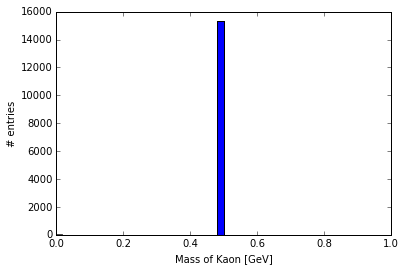

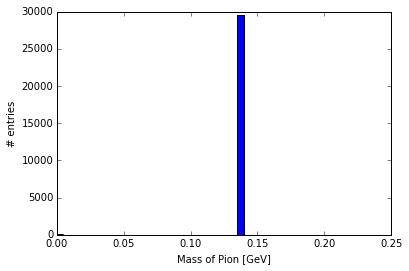

In [4]:
kaons_mass = []
pions_mass = []
d_meson_mass = []

for collision_mc in collisions_mc:
    
    pions,kaons,muons,electrons,photons = collision_mc
         
    for kaon in kaons:
        E,px,py,pz,q = kaon[0:5]
        m1 = mass(E,px,py,pz)
        kaons_mass.append(m1)
    
    for pion in pions:
        E,px,py,pz,q = pion[0:5]
        m2 = mass(E,px,py,pz)
        pions_mass.append(m2)
        
        d_meson = m1 + 2*m2
        d_meson_mass.append(d_meson)
print d_meson

plt.figure()
plt.hist(kaons_mass,bins=50,range=(0,1)) # Why does the range function change the mass that is graphed?
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')

plt.figure()
plt.hist(pions_mass,bins=50,range=(0,0.25))
plt.xlabel('Mass of Pion [GeV]')
plt.ylabel('# entries')

In [5]:
# d_meson = []
 

# for jet in jets:
#     p = particle()
#     if p == "This is a kaon":
#         kaons.append(m)
#     elif p == "This is a pion":
#         pions.append(m)
    
#     total_mass = kaons + pions
#     d_meson.append(total_mass)

# print d_meson
# print pions        